--------
# Especialização em Ciência de Dados
## Módulo de Machine Learning I

**Aluno: Mayke Kend Gomes Delgado**

**Matrícula: 1691690020**

**Professora: Talita Lobo**

--------

In [1]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import seaborn as sn # para visualização dos resultados

from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [2]:
import numpy as np 
import scipy as sp

### Nosso Problema

Neste problema, desejamos descobrir se o contrato foi rescindido ou não de acordo com a nossa classificação, visto que a palavra rescindido tem como significado de um adjetivo que se tornou nulo; que deixou de possuir valor; que foi anulado ou cancelado. **Que foi alvo de rescisão; que deixou de possuir efeito; cujo conteúdo foi anulado: o empreiteiro teve seu contrato rescindido.**

O primeiro passo: **Importação dos dados.**

In [3]:
# Importando os dados sobre o cancer de mama
contratos = pd.read_csv("../dados/contratos-paraiba.csv")

# Exibindo as primeiras linhas do dado
contratos.head()

,CNPJ,cd_UGestora,nu_Contrato,tp_Licitacao,vl_TotalContrato,n_municipios,n_ugestora,total_ganho,perc_vitoria,idade_empresa_anos,descricao_tipo_logradouro,porte_empresa,diff_abertura_primeiro_empenho,status,media_num_contratos
0,1,201002,000332014,2,1.509677,1.093078,2,32.298765,0.168266,1.700670,AVENIDA,3,9504000,1,0.952224
1,2,201005,000692016,11,1.509142,3.861545,52,62.380807,0.377875,2.450000,RUA,3,21686400,1,0.758340
2,3,201013,000012016,11,1.509422,3.525077,53,86.293085,0.680105,2.951923,RUA,3,599529600,1,1.200319
3,4,201013,000022016,11,1.509454,3.348522,45,97.456266,0.778325,2.489817,RURAL,3,67046400,1,1.186823
4,5,201013,000072016,11,1.509463,3.650836,45,66.426296,0.716727,1.695765,RUA,3,9676800,1,0.758340


 ### Obras (2014 > 2017)
 
- CNPJ
- Código da unidade gestora
- Número do contrato
- Tipo da licitação que gerou o contr.
- Valor total do contrato
- Num municípios atendidos p/ empresa
- Num UGs atendidas p/ empresa
- Total ganho pela empresa
- Percentual de vitórias
- Idade da empresa em anos
- Tipo logradouro
- Porte da empresa
- Dias = 1o empenho - abertura
- Status do contrato (1 rescindido)
- Média do número de contratos


### Análise exploratória

#### Formato e tipo dos dados:

In [4]:
# Informações sobre o dado utilizado
contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 15 columns):
CNPJ                              417 non-null int64
cd_UGestora                       417 non-null int64
nu_Contrato                       417 non-null object
tp_Licitacao                      417 non-null int64
vl_TotalContrato                  417 non-null float64
n_municipios                      417 non-null float64
n_ugestora                        417 non-null int64
total_ganho                       417 non-null float64
perc_vitoria                      417 non-null float64
idade_empresa_anos                417 non-null float64
descricao_tipo_logradouro         417 non-null object
porte_empresa                     417 non-null int64
diff_abertura_primeiro_empenho    417 non-null int64
status                            417 non-null int64
media_num_contratos               417 non-null float64
dtypes: float64(6), int64(7), object(2)
memory usage: 48.9+ KB


In [5]:
# entendendo os tipos de cada dado
contratos.dtypes

CNPJ                                int64
cd_UGestora                         int64
nu_Contrato                        object
tp_Licitacao                        int64
vl_TotalContrato                  float64
n_municipios                      float64
n_ugestora                          int64
total_ganho                       float64
perc_vitoria                      float64
idade_empresa_anos                float64
descricao_tipo_logradouro          object
porte_empresa                       int64
diff_abertura_primeiro_empenho      int64
status                              int64
media_num_contratos               float64
dtype: object

In [6]:
contratos.shape # quantidade de linhas e colunas

(417, 15)

In [7]:
contratos.min() # valores minimos entre os dados

CNPJ                                      1
cd_UGestora                           60120
nu_Contrato                       000012014
tp_Licitacao                              1
vl_TotalContrato                     1.5091
n_municipios                              0
n_ugestora                                0
total_ganho                               0
perc_vitoria                              0
idade_empresa_anos                  1.23919
descricao_tipo_logradouro           AVENIDA
porte_empresa                             1
diff_abertura_primeiro_empenho      1209600
status                                    0
media_num_contratos                       0
dtype: object

In [8]:
contratos.max() # valores minimos entre os dados

CNPJ                                     417
cd_UGestora                           610095
nu_Contrato                        l00022011
tp_Licitacao                              12
vl_TotalContrato                     1.50968
n_municipios                         6.78813
n_ugestora                              1121
total_ganho                          154.564
perc_vitoria                           1.048
idade_empresa_anos                   3.19556
descricao_tipo_logradouro              RURAL
porte_empresa                           9999
diff_abertura_primeiro_empenho    1127260800
status                                     1
media_num_contratos                  2.45965
dtype: object

Para as variáveis numéricas é possível (e interessante) gerar um sumário dos dados:

In [9]:
contratos.describe() 
# breve descrição entre contagem de registros
# média
# desvio padrão
# minimo
# quatis em 25%, 50% e 75% da base
# por fim, máximo.

,CNPJ,cd_UGestora,tp_Licitacao,vl_TotalContrato,n_municipios,n_ugestora,total_ganho,perc_vitoria,idade_empresa_anos,porte_empresa,diff_abertura_primeiro_empenho,status,media_num_contratos
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,4.170000e+02,417.000000,417.000000
mean,209.000000,291609.781775,8.350120,1.509348,2.998741,74.884892,68.504893,0.489694,2.226544,146.309353,1.539602e+08,0.333333,1.011726
std,120.521782,167518.477715,4.011666,0.000139,1.539689,134.897579,29.278380,0.259560,0.419724,1191.876616,2.270547e+08,0.471971,0.566997
min,1.000000,60120.000000,1.000000,1.509097,0.000000,0.000000,0.000000,0.000000,1.239186,1.000000,1.209600e+06,0.000000,0.000000
25%,105.000000,201061.000000,2.000000,1.509231,1.928591,7.000000,51.849953,0.327774,1.854188,1.000000,1.486080e+07,0.000000,0.632820
50%,209.000000,201139.000000,11.000000,1.509356,3.002269,24.000000,69.221444,0.513274,2.208614,3.000000,4.285440e+07,0.000000,1.011295
75%,313.000000,201215.000000,11.000000,1.509443,3.985519,68.000000,86.293085,0.664131,2.562410,3.000000,2.020896e+08,1.000000,1.350067
max,417.000000,610095.000000,12.000000,1.509677,6.788129,1121.000000,154.564201,1.047998,3.195563,9999.000000,1.127261e+09,1.000000,2.459646


**Explorando cada variável**

In [10]:
# Contagem do porte da empresa por classe 
contratos["porte_empresa"].value_counts()

1       196
3       127
5        88
9999      6
Name: porte_empresa, dtype: int64

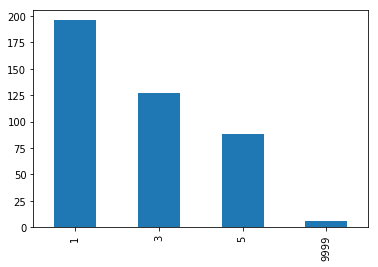

In [11]:
# Gráfico de barras sobre o número do porte da empresa em cada classe
contratos["porte_empresa"].value_counts().plot(kind="bar")

**Nosso dado demonstra que haviam 196 para a primeira empresa, 127 para segunda empresa, 88 para terceira e por fim a quarta e ultima com cerca de 6 em termos de porte**.

In [12]:
# Contagem dos status pela coluna que foram rescindido e não rescindido
contratos["status"].value_counts()

0    278
1    139
Name: status, dtype: int64

**Em se tratando do número 0 (ZERO) com sendo não rescindido, está na frente com 278 contratos. Já os rescindidos são a minoria com 139 contratos**.

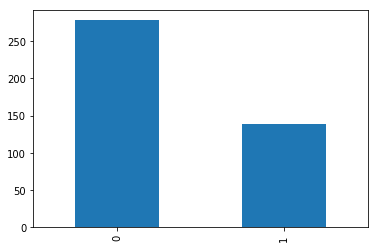

In [13]:
# Gráfico de barras sobre a do percentual de contratos rescindido e não rescindido
contratos["status"].value_counts().plot(kind="bar")

**Vemos ver que a quantidade de não rescindido é quase o dobro da quantidade de contratos rescindidos.**

In [14]:
contratos.columns # listando todas as colunas da base de dados

Index(['CNPJ', 'cd_UGestora', 'nu_Contrato', 'tp_Licitacao',
       'vl_TotalContrato', 'n_municipios', 'n_ugestora', 'total_ganho',
       'perc_vitoria', 'idade_empresa_anos', 'descricao_tipo_logradouro',
       'porte_empresa', 'diff_abertura_primeiro_empenho', 'status',
       'media_num_contratos'],
      dtype='object')

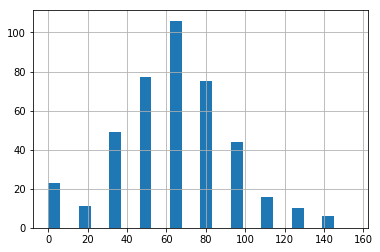

In [15]:
# Histograma da distribuição de total de ganhos sobre cada empresa
contratos["total_ganho"].hist(width=6)

Comparando a taxa de status dos contratos pra diferentes variáveis e até mesmo com a própria variável status por curiosidade.

In [16]:
def status_stacked_bar(variable):
    nrescindido = contratos[contratos["status"]==0][variable].value_counts()/len(contratos["status"]==0)
    rescindido = contratos[contratos["status"]==1][variable].value_counts()/len(contratos["status"]==1)
    
    data = pd.DataFrame([nrescindido,rescindido])
    data.index=["Não rescindido","rescindido"]
    data.plot(kind="bar",stacked=True,title="Porcentagem")
    
    return data.head()

,0,1
Não rescindido,0.666667,NaN
rescindido,NaN,0.333333


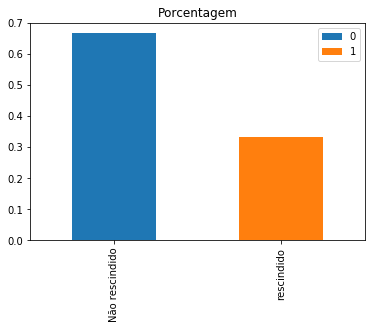

In [17]:
# Utiliza a função criada acima com a variável Status
status_stacked_bar("status")

,1,2,3,5,7,8,10,11,12
Não rescindido,0.011990,0.100719,0.004796,0.002398,0.019185,0.021583,0.023981,0.441247,0.040767
rescindido,0.021583,0.127098,NaN,NaN,0.009592,0.016787,NaN,0.155875,0.002398


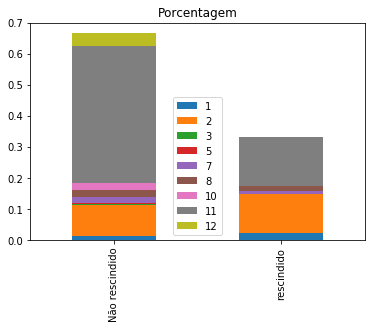

In [18]:
# Utiliza a função criada acima com a variável tp_Licitacao
status_stacked_bar("tp_Licitacao")

,RUA,AVENIDA,OUTRO,RURAL
Não rescindido,0.460432,0.163070,0.040767,0.002398
rescindido,0.230216,0.067146,0.021583,0.014388


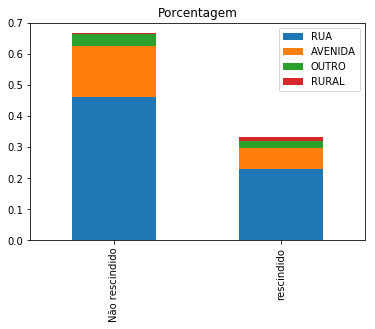

In [19]:
# Utiliza a função criada acima com a variável descricao_tipo_logradouro
status_stacked_bar("descricao_tipo_logradouro")

,1,3,5,9999
Não rescindido,0.309353,0.175060,0.170264,0.011990
rescindido,0.160671,0.129496,0.040767,0.002398


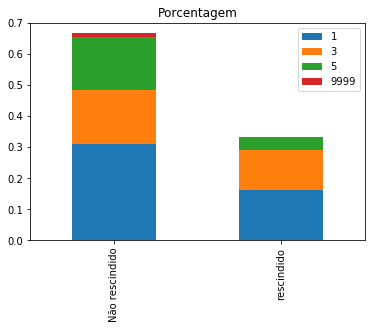

In [20]:
# Utiliza a função criada acima com a variável porte_empresa
status_stacked_bar("porte_empresa")

Em seguida, podemos buscar por valores faltantes nos dados, com o objetivo de decidir qual estratégia 
utilizaremos para lidar com eles:

In [21]:
# 
for i in contratos.columns:
    print (i + ": "+str(sum(contratos[i].isnull()))+" Valores faltantes")

CNPJ: 0 Valores faltantes
cd_UGestora: 0 Valores faltantes
nu_Contrato: 0 Valores faltantes
tp_Licitacao: 0 Valores faltantes
vl_TotalContrato: 0 Valores faltantes
n_municipios: 0 Valores faltantes
n_ugestora: 0 Valores faltantes
total_ganho: 0 Valores faltantes
perc_vitoria: 0 Valores faltantes
idade_empresa_anos: 0 Valores faltantes
descricao_tipo_logradouro: 0 Valores faltantes
porte_empresa: 0 Valores faltantes
diff_abertura_primeiro_empenho: 0 Valores faltantes
status: 0 Valores faltantes
media_num_contratos: 0 Valores faltantes


Pode-se notar que a nossa base de dados não possui nenhum valor faltante

**Note que não possuimos valores faltantes em que a nossa base de dados foi construida com not null. Assim, não seria possivel cadastrar no banco de dados faltando um campo da tabela**

### 1 - Regressão Logística

Teremos que usar a a **Regressão Logística**, do qual é o algoritmo utilizado para quando, a partir de um conjunto de observações, desejamos prever valores assumidos por uma variável categórica binária (0 ou 1).

Em nosso caso, teremos que prever se o contrato será reincidido(1) ou não reincidido(0).

Na Regressão Logística é importante ter em mente alguns pontos:

- A Regressão Logística **Binária** requer que a variável alvo/prevista seja binária
- A depender da biblioteca utilizada, o nível 1 do fator deve ser o resultado esperado
- É preciso haver independência entre as variáveis independentes/preditores
- Este tipo de modelo requer uma quantidade razoável de dados para performar bem 

**O próximo passo, então, será identificar as variáveis independentes(preditores) e a variável alvo (status).**

In [22]:
preditores = contratos[['total_ganho', 'perc_vitoria']]
alvo = contratos['status'] 

Durante o treinamento de modelos é necessário separar o conjunto de dados de maneira a que consigamos treinar o modelo e também avaliá-lo.

**Conjunto de Treino**: Amostra dos dados utilizada para o aprendizado/construção do modelo.

**Dados de Validação**: Amostra dos dados utilizada para a tunagem dos hiperparâmetros do modelo (ou seja, sua arquitetura). Durante o ajuste dos parâmetros do modelo, para evitar *overfitting*, este conjunto é necessário.

**Conjunto de Teste**: Amostra dos dados utilizada para avaliar a capacidade de predição do modelo em novos dados.

Em geral, utiliza-se uma divisão de 80%/20% ou 70%/30% para treino e teste, respectivamente. 

In [23]:
# Divisão dos conjuntos de treino e teste

preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores, alvo, test_size=0.30, random_state=0)

Em seguida, já é possível construir o modelo de Regressão Logística:

In [24]:
# Instancia o modelo de regressão logística com parâmetros default
modelo_reglog = LogisticRegression()
# Treina o modelo com base nos preditores e variável alvo
modelo_reglog.fit(preditores_treino, alvo_treino)
# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
alvo_pred = modelo_reglog.predict(preditores_teste)


C:\Users\mayke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
print(alvo_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


Modelo treinado! E agora?

Agora é preciso avaliar o quão bem o aprendizado do modelo consegue ser generalizado para outros conjuntos de dados ainda não vistos por ele. Avaliamos o desempenho do modelo comparando os dados previstos por ele com os dados reais.

A **Matriz de Confusão** é utilizada para fornecer um panorama do desempenho do modelo. Seus quadrantes estarão exemplificados mais abaixo.

In [26]:
# Matriz de confusão
print(confusion_matrix(alvo_teste, alvo_pred))

[[79  4]
 [37  6]]


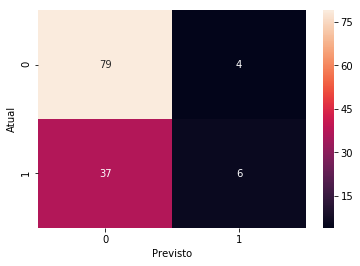

In [27]:
matriz_confusao = pd.crosstab(alvo_teste, alvo_pred, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao, annot=True)

In [28]:
# Acurácia do modelo
print('Acurácia: ', metrics.accuracy_score(alvo_teste, alvo_pred)) # Desempenho geral do modelo

Acurácia:  0.6746031746031746


In [29]:
print('Precisão: ', metrics.precision_score(alvo_teste, alvo_pred)) # Quão precisas são as predições positivas

print('Revocação: ', metrics.recall_score(alvo_teste, alvo_pred)) # Cobertura da amostra positiva real

print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_pred)) # Métrica híbrida últil para classes desequelibradas

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_pred)) # Cobertura de amostra negativa real

Precisão:  0.6
Revocação:  0.13953488372093023
F1-Measure:  0.22641509433962265
ROC AUC:  0.5456710563182965


In [30]:
print(alvo_teste)
print(alvo_pred)

409    0
170    0
224    0
390    0
308    0
307    0
150    0
10     1
21     1
261    0
348    0
59     1
405    0
198    0
351    0
76     1
375    0
164    0
12     1
188    0
345    0
37     1
393    0
54     1
145    0
286    0
199    0
254    0
377    0
309    0
      ..
349    0
246    0
154    0
245    0
389    0
358    0
217    0
400    0
340    0
208    0
56     1
8      1
399    0
155    0
158    0
379    0
276    0
157    0
106    1
263    0
63     1
294    0
168    0
297    0
356    0
81     1
107    1
365    0
413    0
296    0
Name: status, Length: 126, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


Entendendo as métricas acima:

A precisão significa "Quantos elementos selecionados são relevantes?", ou seja: **Dos que meu modelo classificou como positivos, quantos realmente são positivos?**

Enquanto a revocação nos dá "Quantos elementos relevantes foram selecionados?", ou seja: **Dos realmente positivos, quantos consegui selecionar?**

Dificilmente a precisão ou revocação servirão isoladamente para avaliar a eficácia da classificação do modelo. A medida F1 é uma combinação da precisão e da revocação. 
Entretanto não há uma formula pronta para selecionar a melhor métrica de avaliação, é necessário compreender o contexto e o trade-off que cada medida traz.

In [31]:
# Só pra conferir:

# A predição foi feita para os seguintes registros:
print(preditores_teste) 
# Que possuíam a seguinte classificação:
print(alvo_teste)
# E Que obtiveram o seguinte resultado do modelo:
print(alvo_pred)

     total_ganho  perc_vitoria
409    61.766224      0.231531
170    51.502263      1.047998
224    97.608497      0.386196
390    73.873484      0.621601
308    21.090297      0.513274
307    69.004515      0.933924
150    56.776792      0.557102
10     52.038696      0.438484
21     63.623461      0.689432
261    74.926871      0.461900
348   139.362442      0.537569
59     51.949349      0.571743
405    70.309010      0.831908
198     0.000000      0.000000
351    64.420936      0.567703
76     58.723417      0.885671
375    68.480525      0.264694
164    79.734189      0.236414
12     57.232877      0.716727
188    45.595611      0.513274
345    46.764483      0.618701
37    126.049110      0.445125
393    96.177351      0.615952
54     83.082428      0.536631
145    67.530523      0.276895
286    55.262757      0.903631
199    79.631643      0.808071
254    78.042455      0.720291
377    78.896580      0.522489
309    97.040821      0.801267
..           ...           ...
349    3

### 2 - Árvore de Decisão

Neste caso, iremos utilizar os mesmos dados do exemplo anterior para fins de comparação dos modelos treinados. Para comparar modelos corretamente, é preciso que seu treinamento seja realizado com os mesmos conjuntos de treino e teste.

In [32]:
print("Preditores Treino")
print(preditores_treino)

print("Preditores Teste")
print(preditores_teste)

print("Alvo Treino")
print(alvo_treino)

print("Alvo Teste")
print(alvo_teste)

Preditores Treino
     total_ganho  perc_vitoria
96     51.932079      1.047998
380    59.365457      0.418163
89     69.221444      0.593068
233    91.111673      0.577646
191    49.546082      0.408692
353    49.587965      0.513274
253    70.097041      0.838835
92    101.207998      0.517841
240    28.096052      0.000000
194    69.556413      0.513274
381    86.136691      0.556699
159    61.169175      0.540938
206    43.333210      0.178259
66     96.798758      0.584419
278     0.000000      0.000000
175    41.792732      1.047998
140   125.979599      0.384743
101    89.736137      0.536123
326    71.406287      0.246765
205    58.897179      0.711606
342     0.000000      0.000000
17     72.249707      0.927608
146    58.561432      0.144040
171    45.258153      0.513274
218   103.405517      0.285985
30     40.195025      0.091395
114    86.293085      0.680105
320    61.048837      1.047998
103    51.137360      0.740164
196    44.538452      0.276895
..           ...     

In [33]:
# Com isso, já conseguimos construir a árvore:
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(preditores_treino, alvo_treino)

In [34]:
# Realiza a previsão nos dados de teste
arvore_previsao = arvore_decisao.predict(preditores_teste)

In [35]:
print(arvore_previsao)

[1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0]


Treinado o modelo e feita a predição no conjunto de teste, nos resta saber o quão acurada foi a previsão do nosso modelo de árvore.

Para isso, usaremos as mesmas métricas utilizadas anteriormente.

In [36]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, arvore_previsao)) # Desempenho geral do modelo

print('Precisão: ', metrics.precision_score(alvo_teste, arvore_previsao)) # Quão precisas são as predições positivas

print('Revocação: ', metrics.recall_score(alvo_teste, arvore_previsao)) # Cobertura da amostra positiva real

print('F1-Measure: ', metrics.f1_score(alvo_teste, arvore_previsao)) # Métrica híbrida últil para classes desequelibradas

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, arvore_previsao)) # Cobertura de amostra negativa real

Acurácia:  0.5873015873015873
Precisão:  0.41509433962264153
Revocação:  0.5116279069767442
F1-Measure:  0.45833333333333337
ROC AUC:  0.5690669655365649


[[52 31]
 [21 22]]


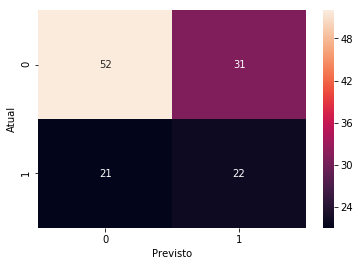

In [37]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, arvore_previsao))


matriz_confusao_arvore = pd.crosstab(alvo_teste, arvore_previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)

**Para refletir**

**O que pode ter acontecido com a árvore?** 

Pode-se perceber que a **Regressão Logística** treinou bastante e exclusivamente os Status dos contratos. Assim, ocasionando em uma Acurácia, o modelo de regressão logística obteve uma acurácia de 0.674 e precisao de 0.6. Bem diferente da **árvore** em que a acurácia ficou em 0.587 com precisão em 0.415, no qual foi necessário tomar uma iniciativa para uma abordagem ainda maior mediante a base no que se diz a respeito de qual modelo melhor se encaixaria. 

**Qual dos modelos é mais eficaz?**

A resposta para essa pergunta foi o uso da **Regressão logística**,da qual melhor explicou meus dados a cerca de % **teste** e % de **predição**.

**É possível melhorar a classificação?**

Sim, com toda certeza, visto que o nosso modelo de aprendizagem de máquina pode haver diferentes maneiras de se analisar.

**Quais minhas maiores dificuldades?**

A minha maior dificuldade não foi o entendimento das variáveis e sim, os valores para serem mostrados como resultados eficazes de nossa análise, tendo em vista aspectos negativos no uso da **Regressão Logistica**, em que pode-se notar a diferença no uso da **Árvore de decisão** como ponto chave dessa primeira análise. Assim, decidi analisar os contratos rescindidos e os não rescindidos.


**Quais os aprendizados?**

Aprendi a entender melhor cada variável, no qual fiz uma análise detalhada em um passo-a-passo efizaz.

### EXTRA

--------
### Justiça & Explicabilidade em Modelos

### Explorando os dados, construindo e interpretando grupos

Para inciarmos com um nova análise a cerda dos dados da Obra para essa segunda etapa do projeto, será necessário duas coisas

- 1) Agrupamento Hierárquico
- 2) K-Means

--------

### Nosso novo problema:

O tipo de problema que desejamos responder com agrupamentos é totalmente diferente do que respondemos com regressão e classificação. **O objetivo é encontrar padrões que denotem grupos, agrupamentos de ocorrências com características semelhantes**.

Neste caso, queremos saber se *existem municípios que mais lucraram de acordo com o total de ganhos mediante as empresas*?


No contexto do nosso problema, queremos diferenciar o número de municípios em relação aos ganhos obitivos pelas empresas. Das características disponíveis no dataset, as variáveis que denotam isso são: n_municipios e total_ganho.

Selecionando apenas as colunas que temos interesse:

In [38]:
contratos_filtro = contratos[['n_municipios', 'total_ganho']] # separando as variáveis da base de dados

In [39]:
contratos_filtro.info() # informação geral, note que não pontos lutuantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
n_municipios    417 non-null float64
total_ganho     417 non-null float64
dtypes: float64(2)
memory usage: 6.6 KB


---

## Agrupamento Hierárquico

A partir disso já conseguimos realizar a primeira visualização de grupos nos dados

In [40]:
contratos.columns 

Index(['CNPJ', 'cd_UGestora', 'nu_Contrato', 'tp_Licitacao',
       'vl_TotalContrato', 'n_municipios', 'n_ugestora', 'total_ganho',
       'perc_vitoria', 'idade_empresa_anos', 'descricao_tipo_logradouro',
       'porte_empresa', 'diff_abertura_primeiro_empenho', 'status',
       'media_num_contratos'],
      dtype='object')

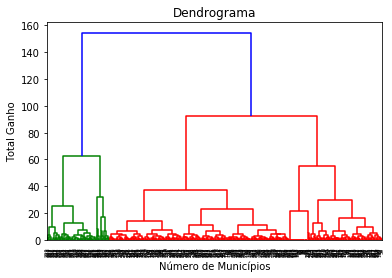

In [41]:
dendrograma = sch.dendrogram(sch.linkage(contratos_filtro, method='complete'))
plt.title('Dendrograma')
plt.xlabel('Número de Municípios')
plt.ylabel('Total Ganho')
plt.show()

>A distância vertical no gráfico representa a distância entre as observações/grupos, a dissimilaridade entre aquelas observações ou grupos (a depender do nível observado). 
Uma maneira comum para analisar a quantidade de grupos no conjunto de dados é traçar linhas horizontais no dendrograma e verificar a quantidade de grupos evidentes e, em seguida, verificar a distância entre eles, nos interessa uma maior distância intergrupo. 
**Note que não houve essa distância intensa entre os grupo, isso nos mostra uma similaridade entre os dados.**

À primeira vista, vemos a presença de 1 grupo pequeno. Com arestas **verdes**, há 3 agrupamentos de dados com uma distância pequena entre si, entretanto com uma distância maior em relação aos agrupamentos mais abaixo.

Do lado **vermelho**, essa distância já é menos evidente.

Traçando uma linha pouco abaixo de y=85 á 90, temos 3 agrupamentos de dados.

Traçando uma linha em ~y=60, temos mais de 7 agrupamentos de dados não muito visível.

#### Construindo o taggeamento dos grupos

In [42]:
modelo_hierarquico = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='complete')

# O Ward tenta minimizar a variância em cada grupo. Aqui são alguns exemplos
# ward, single, average, and complete
# Portanto, usaremos o complete pelo fato que dar um maior alcance na visiaçização do dado posteriormente

In [43]:
modelo_hierarquico # montando o modelo hierarquico

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [44]:
modelo_hierarquico.fit_predict(contratos_filtro) # efetuando o predict para o nosso filtro

array([1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       2, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2,

In [45]:
print(modelo_hierarquico.labels_) # visualizando de modo que mostre os labels de nosso modelo para minimiazr a visualização

[1 2 2 0 2 2 2 1 2 2 1 2 2 0 1 1 2 2 2 0 2 2 2 2 2 2 1 1 2 2 1 1 2 2 1 2 0
 0 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 0 1 0 2 2 2 1 2 2 2
 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 0 1 1 1 1 2 1 2 2 2 1 1 1 2 2 1 1 2 1
 1 2 1 2 0 2 1 2 0 2 0 0 2 2 2 1 2 2 2 2 1 1 1 2 2 2 1 1 2 0 2 1 2 1 2 2 1
 0 0 2 1 0 2 1 0 0 2 2 2 2 2 0 2 2 2 0 0 2 2 1 1 2 1 1 1 0 1 2 2 2 1 2 2 1
 0 2 0 1 2 1 1 2 1 2 0 1 0 1 2 2 0 0 1 0 2 1 2 2 1 2 0 0 1 2 1 1 2 0 2 2 1
 1 2 0 2 2 0 2 0 2 1 0 2 1 1 1 0 2 2 1 2 2 2 0 2 0 2 0 1 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 0 0 1 2 0 0 2 2 1 2 2 1 1 1 0 2 0 2 0 2 0 0 0 1 0 1 2 1 2
 2 1 0 0 2 0 1 0 0 2 2 2 1 0 2 0 1 1 0 2 1 1 2 1 2 1 0 0 2 2 2 2 0 1 2 2 2
 2 1 0 2 2 2 0 2 2 1 2 2 1 2 2 0 1 1 2 0 1 1 0 1 1 0 2 2 2 0 2 1 1 2 2 0 0
 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 1 2 1 0 2 0 1 0 1 2 2 2 0 2 2 2 2 2 2 2 2
 1 2 2 2 2 0 1 1 2 2]


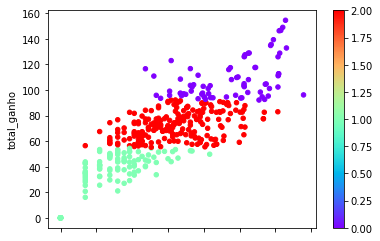

In [46]:
contratos_filtro.plot.scatter(x='n_municipios', y='total_ganho', c=modelo_hierarquico.labels_, cmap='rainbow')

Pode-se dizer que de acordo com a hierarquia analisada extraída do Dendrograma , pode se perceber 3 grupos. Analisando de baixo para cima temos:


-**Grupo verde:** Mostra o número de municípios que menos faturaram com as obras.

-**Grupo Vermelho:** São municípios que estão na média em termos de ganhos.

-**Grupo Roxo:** Esse grupo mostra os que mais faturaram com as obras.

Então, a pergunta para essa análise seria: **"Queremos saber se existem grupos mediante ao número de  município que mais se destacaram em termos de ganhos com as obra?"**

### E se utilizássemos um número diferente de grupos?

In [47]:
modelo_hierarquico_dois = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')

In [48]:
modelo_hierarquico_dois.fit_predict(contratos_filtro)

predicao_dois = modelo_hierarquico_dois.fit_predict(contratos_filtro)

In [49]:
predicao_dois

array([4, 3, 1, 0, 3, 1, 3, 4, 1, 3, 3, 3, 3, 0, 2, 4, 3, 1, 1, 0, 3, 3,
       3, 1, 1, 3, 2, 3, 1, 1, 4, 2, 3, 3, 2, 1, 0, 0, 2, 2, 4, 4, 3, 3,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 3, 1, 2, 0, 3,
       0, 1, 1, 1, 4, 1, 1, 1, 4, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 0, 4, 4, 3, 3, 1, 4, 1, 1, 1, 4, 3, 3, 3, 1, 2, 2, 3,
       4, 2, 0, 3, 1, 0, 1, 4, 1, 0, 3, 0, 0, 1, 1, 1, 4, 1, 1, 1, 1, 3,
       3, 4, 3, 1, 1, 4, 4, 1, 0, 3, 3, 3, 2, 1, 3, 4, 0, 0, 3, 3, 0, 1,
       4, 0, 0, 1, 1, 3, 3, 3, 0, 1, 1, 1, 0, 0, 1, 3, 3, 3, 1, 4, 4, 4,
       0, 4, 3, 1, 3, 4, 3, 1, 2, 0, 1, 0, 3, 3, 2, 3, 3, 4, 1, 0, 4, 0,
       2, 1, 1, 0, 0, 3, 0, 3, 4, 3, 1, 3, 1, 0, 0, 4, 1, 4, 4, 1, 0, 1,
       3, 3, 4, 3, 0, 1, 1, 0, 3, 0, 1, 4, 0, 1, 2, 4, 4, 0, 1, 1, 4, 1,
       3, 1, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 0, 0, 3, 3, 0, 0, 0, 3, 3, 1, 3, 2, 2, 4, 0, 1, 0, 1, 0,
       3, 0, 0, 0, 4, 0, 3, 1, 4, 3, 3, 3, 0, 0, 3,

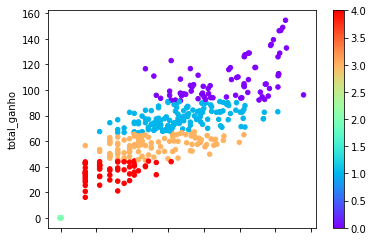

In [50]:
contratos_filtro.plot.scatter(x='n_municipios', y='total_ganho', c=modelo_hierarquico_dois.labels_, cmap='rainbow')

Note que agora são 5 grupos, visto que não ficou auto-explicativo nesse segunda análise. Assim, **sendo mais eficiente o scatter anterior**.

### E se incluíssemos apenas a avaliação dos municipios? Geraríamos grupos diferentes?

In [51]:
contratos_filtod = contratos[['n_municipios']] 

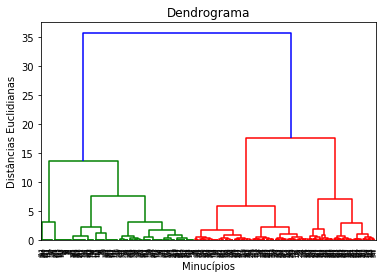

In [52]:
dendrograma = sch.dendrogram(sch.linkage(contratos_filtod, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Minucípios')
plt.ylabel('Distâncias Euclidianas')
plt.show()

Já vemos uma considerável mudança na configuração dos grupos. **Agrupamentos sempre irão gerar grupos, o que não quer dizer que eles são úteis**.

> **A escala tem influência no cálculo das distâncias?**
**Como solucionar isso?** Neste caso, a variável total_ganho tem uma escala completamente diferente (e desproporcional) a n_municipios. Já que isso influencia no cálculo das distâncias: SCALE!

## Por curiosidade, gostaria de usar o K-Means para essa base de dados

Vamos a uma breve descrição desse assunto. **O K-Means** também é um algoritmo de agrupamento (**não-hierárquico**) bastante utilizado.

**Vamos usá-lo para responder a mesma questão acima e ver se temos uma diferenciação nos grupos gerados**.

In [53]:
contratos_filtro.info() # infomrações dos contratos para um melhor entendimento para o uso do K-Means

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
n_municipios    417 non-null float64
total_ganho     417 non-null float64
dtypes: float64(2)
memory usage: 6.6 KB


Se tivéssemos que determinar a quantidade ideal de gurpos, teríamos que rodar n vezes o K-Means n vezes, visto que não seria prático.

### Uma visão geral do K-Means:

Quando aumentamos a quantidade de grupos indefinidamente, as dissimilaridade entre grupos cai - aumentando a heterogeneidade de cada grupo. Daí a importância de encontrar o valor ótimo para a quantidade de grupos buscado: **encontrar uma alta similaridade entre membros do mesmo grupo e baixa similaridade entre grupos distintos (ou membros de grupos distintos)**.

Outro modo (além da distância) de determinar o número de grupos a serem passados como parâmetro do modelo é o método do joelho ou do cotovelo.

**A função abaixo calcula 14 vezes o K-Means, gerando uma saída que pode resultar entre 2 e 15 grupos distintos**.

In [54]:
# Com isso, calculamos o WCSS (soma dos quadrados intra-cluster) para cada resultado do K-Means.

def calculate_wcss(data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(X = data)
        wcss.append(kmeans.inertia_)

    return wcss


**Dado que o objetivo é minimizar o WCSS, vamos ao gráfico**:

Text(0, 0.5, 'WCSS')

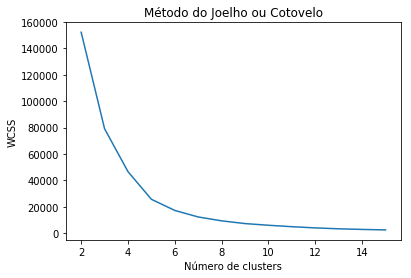

In [55]:
# Soma dos quadrados intra-cluster - WCSS (within- clusters sum-of-squares) 
plt.plot(range(2, 16), calculate_wcss(contratos_filtro))
plt.title('Método do Joelho ou Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [56]:
soma_dos_quadrados = calculate_wcss(contratos_filtro)

soma_dos_quadrados

[152177.4598997921,
 79088.555533286,
 46625.968030269556,
 25660.58431728934,
 17271.40671116592,
 12278.353789469726,
 9356.426764121437,
 7262.706792930034,
 6001.232619082046,
 4912.802217743243,
 4036.2641721184773,
 3341.642710405866,
 2902.5511783676757,
 2465.3246980392214]

Já temos os valores da soma dos quadrados entra grupos. Como utilizamos isso para escolher o número de grupos?

"O ponto que indica o equilíbrio entre maior homogeneidade dentro do grupo e a maior diferença entre grupos, é o ponto da curva mais distante de uma **reta traçada entre" o primeiro e o último ponto do gráfico acima**. Isso pode ser calculado a partir da distância entre um ponto e uma reta.

**A função abaixo calcula a distância entre cada ponto da curva e essa curva imaginária entre o primeiro o último ponto, nos retornando o ponto de distância máxima**.

In [57]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

# note que criaremos uma função optimal_number_of_clusters 
# com o intuito de haver uma divisão entre os eixos de X1,X2 e Y1,Y2 para os WCSS
# Fizemos as distâncias com ajuda do For junto com a função

In [58]:
numero_de_grupos = optimal_number_of_clusters(soma_dos_quadrados)

numero_de_grupos # Esse é o núemro de grupos ideal para nossa análise

6

**Utilizaremos o valor para a construção do modelo:**

In [59]:
kmeans = KMeans(n_clusters = numero_de_grupos)

grupos = kmeans.fit_predict(contratos_filtro)

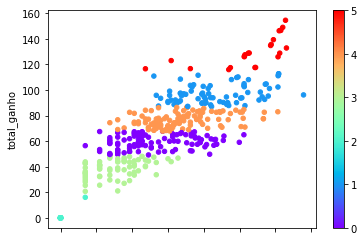

In [60]:

contratos_filtro.plot.scatter(x='n_municipios', y='total_ganho', c=kmeans.labels_, cmap='rainbow')

>**Distintamente do exemplo com agrupamento hierárquico, encontramos que o número ótimo de grupos nesse caso são 6 grupos mediante ao K-Means**, Portanto, pode-se perceber que nossa análise foi muito mais a fundo entre os dados, no qual determinamos todas as caracteristicas em nosso classificador junto à ajuda de análises como: O processo de treinamento; avaliação e escolha do(s) modelos; interpretação da matriz de confusão; resultados do modelo e suas predições.

**Dificuldades**

Como eu já havia relatado anteriormente, a maior dificuldade não foi o entendimento das variáveis e sim, os valores para serem mostrados como resultados eficazes de nossa análise, tendo em vista aspectos negativos no uso da Regressão Logistica, em que pode-se notar a diferença no uso da Árvore de decisão como ponto chave dessa **primeira análise**. No entanto, o grau em dificuldade para gerar uma pergunta ao nosso problema para contratos **reincidido e não reincidido** fi realmente um desafio separar cada variável.

**Aprendizagem**

Aprendi a entender melhor cada variável, seguir um passo-a-passo, no qual fiz uma análise detalhada de modo eficiente em que acompanhei bastante o material da professora Talita Lobo que consta no link(GitHub):https://github.com/talitalobo/EspecializacaoUnifacisa2019

**Curiosidades**

Como em nosso projeto não estava inserido o uso de **Hierarquia e K-Means em Machine learning I** referente ao link do porjeto: https://docs.google.com/document/d/1ziGe5hiwty5Sd7tOItY310hwq8mvQv73PnOePV3Pkwo/edit tive a iniciativa de fazer mais de uma análise em nossa base de dados Obras 2014 - 2017, visto que é realmente um grande desafio para nos como alunos em uam tecnologia que só tende-se a crescer cada vez mais.